# **World Development Indicators**

Pete Santiago<br>
Joey Tuason

## Problem Statment

This deck will focus on the following issues we will try to address using visuals:

1. How does the Philippines fare in comparison to its neighboring countries in Asia and the world in terms of selected development indicators?

2. Using our developed Asian counterparts as a basis, in what sectors should the different government units focus on to push the progress of the Philippines?

## Initial Setup

### Load data

In [ ]:
# Tools for data reading and manipulation
import pandas as pd
import numpy as np

### Load Visualization Tools

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib import rcParams, cycler
from matplotlib import cm

import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.ticker as ticker
import matplotlib.animation as animation

!pip install sweetviz
import sweetviz as sv

#for tree map
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Load Geospatial Analysis Tools

In [ ]:
!pip install geopandas
!pip install mapclassify

import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 16.7 MB 25.7 MB/s 
     |████████████████████████████████| 6.3 MB 26.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Ignore Warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Load datasets

In [ ]:
# import from colab

! gdown 1zNdpLD4ibziJKmySW9gzifbqYJXD-ann #WDI
! gdown 1hsQfiDIKjNT45axEimV-rp7VuvmOP-yG #WDI
! gdown 1u8Enb05BsCruSsojsTdD5glmw62qe3GY #for country continent mapping

# shape data (world map)
! gdown 1xwknA_P_KG4XBPqkAPuGDVOoWmxTd_zs
! gdown 1wDhZYuVKwwPprenbZJ4VjqgiF7dLvoIC
! gdown 1tWTrdWojL6olc6pshUjOQYcPCY4ST-AH
! gdown 1T2zi47-DkIgrnn-HCCu3HZYI3a4XgxbB
! gdown 1DhpIj_eINVY6BGB5K1QsxK6dJsRAi3kQ
! gdown 11d8a6tGhRPAWbHSeaWT5nQ6n9DLl1ua4
! gdown 117jeYPgCPwWZWzl8hPyjTRNj8QGqIolx

Downloading...
From: https://drive.google.com/uc?id=1zNdpLD4ibziJKmySW9gzifbqYJXD-ann
To: /content/WDIData.csv
100% 209M/209M [00:01<00:00, 160MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hsQfiDIKjNT45axEimV-rp7VuvmOP-yG
To: /content/WDICountry.csv
100% 156k/156k [00:00<00:00, 39.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u8Enb05BsCruSsojsTdD5glmw62qe3GY
To: /content/country-continent-scrape.csv
100% 14.8k/14.8k [00:00<00:00, 9.67MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xwknA_P_KG4XBPqkAPuGDVOoWmxTd_zs
To: /content/world.shx
100% 2.07k/2.07k [00:00<00:00, 2.57MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wDhZYuVKwwPprenbZJ4VjqgiF7dLvoIC
To: /content/world.shp
100% 6.48M/6.48M [00:00<00:00, 138MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tWTrdWojL6olc6pshUjOQYcPCY4ST-AH
To: /content/world.dbf
100% 24.7k/24.7k [00:00<00:00, 23.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1T2zi47-DkIgrnn-HCCu3HZYI3a4

**Main datasets from World Bank**

In [ ]:
df = pd.read_csv('WDIData.csv')
country = pd.read_csv('WDICountry.csv')

**Base Dataset**

In [ ]:
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839,NaN,NaN


In [ ]:
df.shape

(384370, 67)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384370 entries, 0 to 384369
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    384370 non-null  object 
 1   Country Code    384370 non-null  object 
 2   Indicator Name  384370 non-null  object 
 3   Indicator Code  384370 non-null  object 
 4   1960            36961 non-null   float64
 5   1961            41895 non-null   float64
 6   1962            44138 non-null   float64
 7   1963            43978 non-null   float64
 8   1964            44496 non-null   float64
 9   1965            46678 non-null   float64
 10  1966            46705 non-null   float64
 11  1967            48473 non-null   float64
 12  1968            48047 non-null   float64
 13  1969            48840 non-null   float64
 14  1970            67083 non-null   float64
 15  1971            74178 non-null   float64
 16  1972            77302 non-null   float64
 17  1973      

In [ ]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [ ]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
Unnamed: 66       float64
Length: 67, dtype: object

In [ ]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
count,3.696100e+04,4.189500e+04,4.413800e+04,4.397800e+04,4.449600e+04,4.667800e+04,4.670500e+04,4.847300e+04,4.804700e+04,4.884000e+04,...,2.111930e+05,2.182060e+05,2.148850e+05,2.134830e+05,2.111050e+05,2.064400e+05,1.864280e+05,1.360230e+05,1.002600e+04,0.0
mean,2.632139e+11,2.511467e+11,2.533648e+11,2.623897e+11,2.800057e+11,3.028999e+11,3.255354e+11,3.424898e+11,3.952434e+11,4.367247e+11,...,2.691599e+12,2.847441e+12,3.014275e+12,3.301323e+12,3.495451e+12,3.981277e+12,4.876235e+12,7.368560e+12,8.737110e+09,NaN
std,1.088116e+13,1.122256e+13,1.170478e+13,1.231797e+13,1.327479e+13,1.485341e+13,1.636822e+13,1.785874e+13,2.052663e+13,2.347749e+13,...,1.083334e+14,1.185633e+14,1.251362e+14,1.390445e+14,1.501291e+14,1.742271e+14,2.142196e+14,3.160165e+14,8.771807e+10,NaN
min,-3.344191e+14,-3.823000e+14,-4.327955e+14,-4.769875e+14,-5.339358e+14,-6.264716e+14,-7.120024e+14,-8.245134e+14,-9.379467e+14,-1.122499e+15,...,-3.495617e+14,-5.189385e+14,-8.530882e+14,-1.374106e+15,-1.345846e+15,-1.297804e+15,-1.376877e+15,-2.021453e+15,-1.310011e+11,NaN
25%,4.712025e+00,4.626389e+00,4.539559e+00,4.778344e+00,4.873246e+00,4.701735e+00,4.917624e+00,4.791858e+00,5.048231e+00,5.125840e+00,...,6.018287e+00,5.960000e+00,6.067067e+00,5.974617e+00,6.128346e+00,5.740207e+00,6.084566e+00,5.094602e+00,6.601761e+00,NaN
50%,3.891524e+01,3.703749e+01,3.579179e+01,3.512069e+01,3.626467e+01,3.752409e+01,3.944200e+01,4.039652e+01,4.123678e+01,4.202522e+01,...,4.341130e+01,4.280000e+01,4.436248e+01,4.415935e+01,4.600000e+01,4.253723e+01,4.398016e+01,4.017370e+01,2.969781e+01,NaN
75%,1.360080e+05,1.030000e+05,7.115500e+04,9.067200e+04,1.030000e+05,1.645828e+05,2.128490e+05,1.957910e+05,3.220240e+05,3.571712e+05,...,2.390100e+04,1.320271e+04,2.190000e+04,1.934593e+04,2.178000e+04,2.633429e+04,7.614975e+04,3.197410e+05,7.973917e+01,NaN
max,8.305080e+14,9.255598e+14,1.005053e+15,1.078014e+15,1.177340e+15,1.380081e+15,1.535078e+15,1.713571e+15,1.967195e+15,2.287805e+15,...,1.000180e+16,1.155185e+16,1.167182e+16,1.319156e+16,1.534503e+16,1.923397e+16,2.487906e+16,3.600718e+16,3.427931e+12,NaN


In [ ]:
#df.column.value_counts()

In [ ]:
# check unique elements per non-numeric column
for x in df.columns[df.dtypes != np.int64]:
    print(x)
    print(df[x].unique())

Country Name
['Africa Eastern and Southern' 'Africa Western and Central' 'Arab World'
 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IB

In [ ]:
# check how many unique elements in non-numeric columns
for x in df.columns[df.dtypes != np.int64]:
    print(x + ' ' + str(df[x].nunique()))

Country Name 266
Country Code 266
Indicator Name 1445
Indicator Code 1445
1960 32669
1961 37756
1962 39689
1963 39643
1964 40041
1965 41555
1966 42112
1967 43510
1968 43293
1969 43831
1970 57977
1971 64569
1972 67093
1973 66913
1974 68372
1975 71230
1976 73302
1977 76496
1978 76489
1979 77242
1980 80903
1981 82784
1982 84112
1983 83935
1984 84489
1985 85569
1986 86417
1987 87624
1988 86266
1989 87476
1990 105917
1991 111963
1992 115873
1993 116880
1994 118975
1995 124838
1996 125148
1997 126912
1998 127758
1999 132668
2000 148277
2001 146625
2002 150542
2003 149684
2004 152122
2005 156837
2006 156527
2007 161060
2008 161163
2009 161682
2010 169047
2011 167004
2012 168755
2013 165368
2014 170176
2015 162568
2016 165712
2017 163792
2018 159263
2019 143949
2020 112697
2021 8252
Unnamed: 66 0


**Country Details Dataset**

In [ ]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts dat...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN


In [ ]:
country.shape

(265, 31)

In [ ]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       265 non-null    object 
 1   Short Name                                         265 non-null    object 
 2   Table Name                                         265 non-null    object 
 3   Long Name                                          265 non-null    object 
 4   2-alpha code                                       263 non-null    object 
 5   Currency Unit                                      217 non-null    object 
 6   Special Notes                                      124 non-null    object 
 7   Region                                             217 non-null    object 
 8   Income Group                                       216 non-null    object 
 9   WB-2 code 

In [ ]:
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')

In [ ]:
country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [ ]:
country.describe()

,National accounts reference year,Alternative conversion factor,PPP survey year,Latest industrial data,Latest trade data,Unnamed: 30
count,74.000000,0.0,0.0,147.000000,191.000000,0.0
mean,2012.905405,NaN,NaN,2007.040816,2016.633508,NaN
std,3.993724,NaN,NaN,9.420815,3.256043,NaN
min,2000.000000,NaN,NaN,1973.000000,1995.000000,NaN
25%,2010.000000,NaN,NaN,2002.500000,2017.000000,NaN
50%,2015.000000,NaN,NaN,2012.000000,2018.000000,NaN
75%,2015.000000,NaN,NaN,2013.000000,2018.000000,NaN
max,2020.000000,NaN,NaN,2014.000000,2018.000000,NaN


In [ ]:
#country.column.value_counts()

In [ ]:
# check unique elements per non-numeric column
for x in country.columns[country.dtypes != np.int64]:
    print(x)
    print(country[x].unique())

Country Code
['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN'
 'CEB' 'CHE' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV'
 'CRI' 'CSS' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST'
 'ETH' 'EUU' 'FCS' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA'
 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC'
 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX'
 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ'
 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR' 'LBY'
 'LCA' 'LCN' 'LDC' 'LIC' 'LIE' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU' 'LUX'
 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNA' 'MNE' '

In [ ]:
# check how many unique elements in non-numeric columns
for x in country.columns[country.dtypes != np.int64]:
    print(x + ' ' + str(country[x].nunique()))

Country Code 265
Short Name 265
Table Name 265
Long Name 265
2-alpha code 263
Currency Unit 152
Special Notes 109
Region 7
Income Group 4
WB-2 code 264
National accounts base year 35
National accounts reference year 16
SNA price valuation 2
Lending category 3
Other groups 2
System of National Accounts 3
Alternative conversion factor 0
PPP survey year 0
Balance of Payments Manual in use 2
External debt Reporting status 3
System of trade 2
Government Accounting concept 2
IMF data dissemination standard 3
Latest population census 32
Latest household survey 80
Source of most recent Income and expenditure data 68
Vital registration complete 2
Latest agricultural census 30
Latest industrial data 33
Latest trade data 16
Unnamed: 30 0


**Scraped dataset from statisticstimes.com**

Country Mapping: Region & Continent

In [ ]:
continentmap = pd.read_csv('country-continent-scrape.csv') #scraped data
continentmap.head()

,NO,Country or Area,ISO-alpha3,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania


In [ ]:
continentmap.shape

(249, 7)

In [ ]:
continentmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NO               249 non-null    int64 
 1   Country or Area  249 non-null    object
 2   ISO-alpha3       249 non-null    object
 3   M49 Code         249 non-null    int64 
 4   Region 1         249 non-null    object
 5   Region 2         108 non-null    object
 6   Continent        249 non-null    object
dtypes: int64(2), object(5)
memory usage: 13.7+ KB


In [ ]:
continentmap.columns

Index(['NO', 'Country or Area', 'ISO-alpha3', 'M49 Code', 'Region 1',
       'Region 2', 'Continent'],
      dtype='object')

In [ ]:
continentmap.dtypes

NO                  int64
Country or Area    object
ISO-alpha3         object
M49 Code            int64
Region 1           object
Region 2           object
Continent          object
dtype: object

In [ ]:
continentmap.describe()

,NO,M49 Code
count,249.000000,249.000000
mean,125.000000,435.931727
std,72.024301,252.848257
min,1.000000,4.000000
25%,63.000000,222.000000
50%,125.000000,438.000000
75%,187.000000,654.000000
max,249.000000,894.000000


In [ ]:
# check unique elements per non-numeric column
for x in continentmap.columns[continentmap.dtypes != np.int64]:
    print(x)
    print(continentmap[x].unique())

Country or Area
['Afghanistan' 'Åland Islands' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bonaire, Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Bouvet Island' 'Brazil' 'British Indian Ocean Territory'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong Special Administrative Region'
 'China, Macao Special Administrative Region' 'Christmas Island'
 'Cocos (Keeling) Islands' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Côte d’Ivoire' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Repub

In [ ]:
# check how many unique elements in non-numeric columns
for x in continentmap.columns[continentmap.dtypes != np.int64]:
    print(x + ' ' + str(continentmap[x].nunique()))

Country or Area 249
ISO-alpha3 249
Region 1 23
Region 2 3
Continent 7


## Data Cleaning

All the checks and dataset reconfiguration will go here.

In [ ]:
# drop the last column
df = df.iloc[:, :-1]
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.559819,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.281667,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.601816,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.844384,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.402592,18.663502,17.633986,16.464681,24.531436,25.345111,27.449908,29.641760,30.404935,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384365,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN
384366,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.418352,NaN,NaN
384367,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.658057,NaN,NaN
384368,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.900000,59.200000,59.400000,59.500000,59.700000,59.900000,60.000000,60.200000,60.400000,NaN


In [ ]:
# list all possible world development indicators to choose from in our EDA
list(df['Indicator Name'].unique())

['Access to clean fuels and technologies for cooking (% of population)',
 'Access to clean fuels and technologies for cooking, rural (% of rural population)',
 'Access to clean fuels and technologies for cooking, urban (% of urban population)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of

### Map the `country` dataset

In [ ]:
df = df.merge(country, on='Country Code', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384370 entries, 0 to 384369
Data columns (total 96 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Country Name                                       384370 non-null  object 
 1   Country Code                                       384370 non-null  object 
 2   Indicator Name                                     384370 non-null  object 
 3   Indicator Code                                     384370 non-null  object 
 4   1960                                               36961 non-null   float64
 5   1961                                               41895 non-null   float64
 6   1962                                               44138 non-null   float64
 7   1963                                               43978 non-null   float64
 8   1964                                               44496 non-null   float6

In [ ]:
# similarly, drop the last column
df = df.iloc[:, :-1]
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Map the `continentmap` dataset (scraped data)

Use the ISO-Alpha3 code to map `Region 1` and `Continent` from `continentmap` to `df`.

In [ ]:
df = df.merge(continentmap.loc[:,['ISO-alpha3','Region 1','Region 2','Continent']], left_on='Country Code', right_on='ISO-alpha3', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384370 entries, 0 to 384369
Data columns (total 99 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Country Name                                       384370 non-null  object 
 1   Country Code                                       384370 non-null  object 
 2   Indicator Name                                     384370 non-null  object 
 3   Indicator Code                                     384370 non-null  object 
 4   1960                                               36961 non-null   float64
 5   1961                                               41895 non-null   float64
 6   1962                                               44138 non-null   float64
 7   1963                                               43978 non-null   float64
 8   1964                                               44496 non-null   float6

**Main Dataset:** Create a working `df` that uses select columns with the column years melted into rows.

In [ ]:
# define columns needed, you can add/modify column to plots here

#columns
year = [str(x) for x in range(1960,2022,1)]
req_cols = ['Country Name','Country Code','Indicator Name','Indicator Code','Region 1','Continent']

# dataset
df_compact = df.loc[:,req_cols+year]

In [ ]:
# use to flip columns to rows in order to create time series
df_plot = df_compact.melt(id_vars=req_cols, var_name='Year', value_name='Value')
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23830940 entries, 0 to 23830939
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country Name    object 
 1   Country Code    object 
 2   Indicator Name  object 
 3   Indicator Code  object 
 4   Region 1        object 
 5   Continent       object 
 6   Year            object 
 7   Value           float64
dtypes: float64(1), object(7)
memory usage: 1.4+ GB


In [ ]:
df_plot['Year'] = df_plot['Year'].astype(int)

## Exploratory Data Analysis

### Using Sweetviz

We will use the non-melted dataset for this.

In [ ]:
df_sweet = df.loc[:,['Country Name','Country Code','Indicator Name','Indicator Code','Region 1','Region 2','Continent']]

In [ ]:
sweet_report = sv.analyze(df_sweet)

                                             |          | [  0%]   00:00 -> (? left)


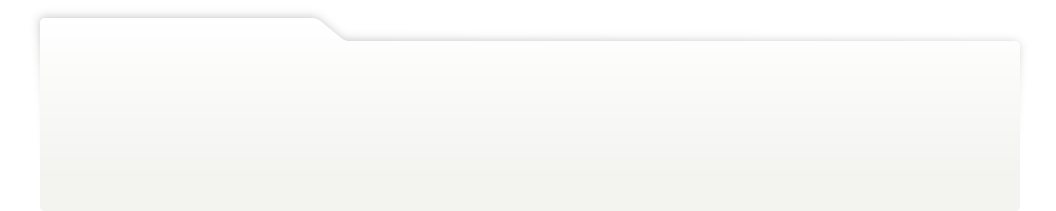
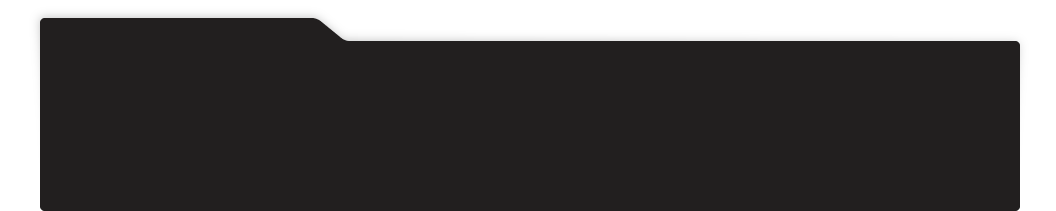
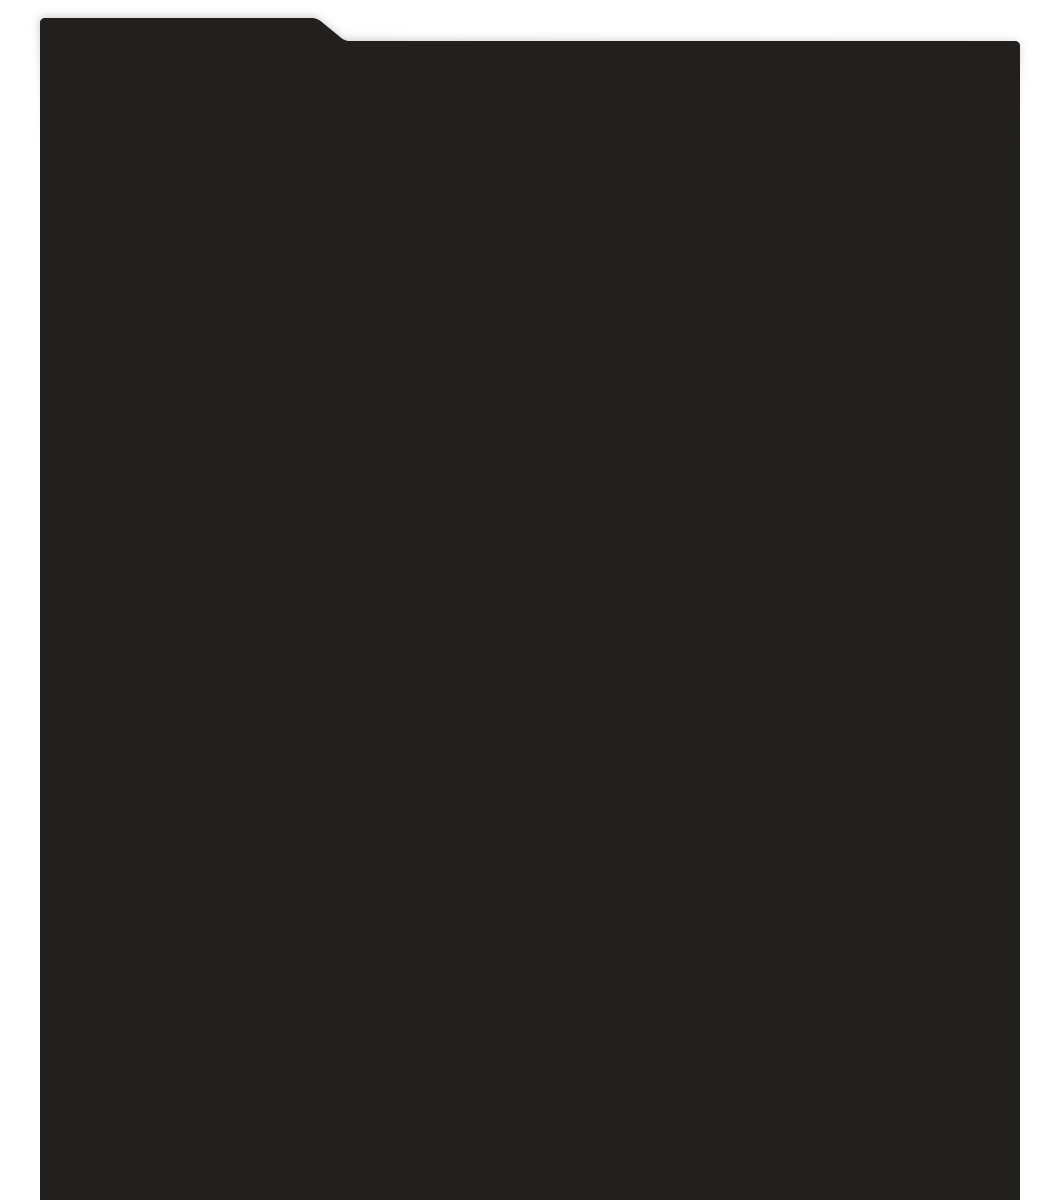
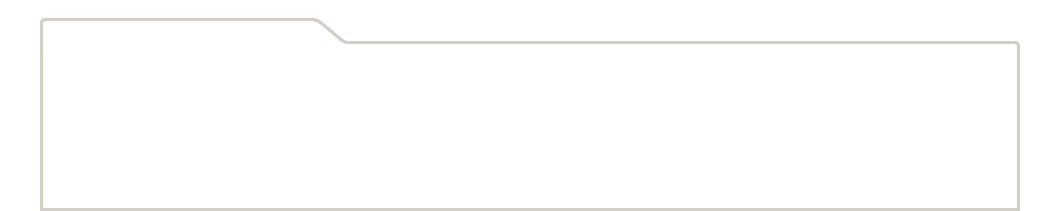
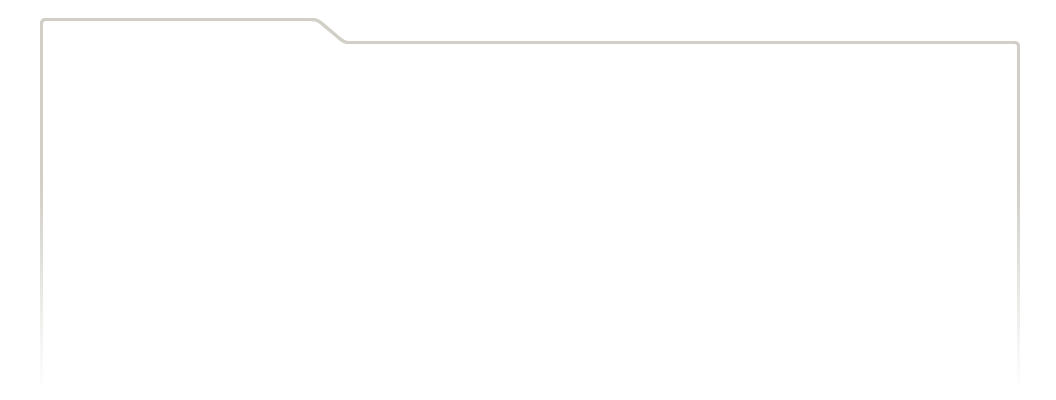
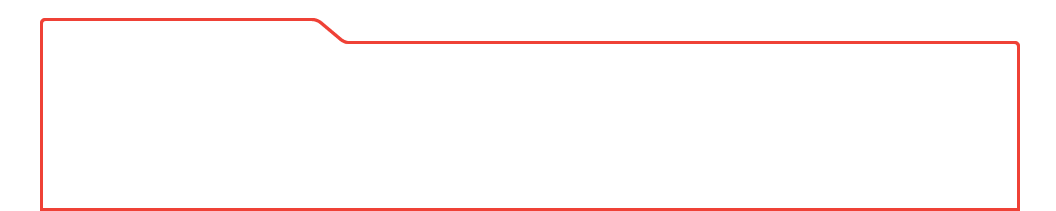
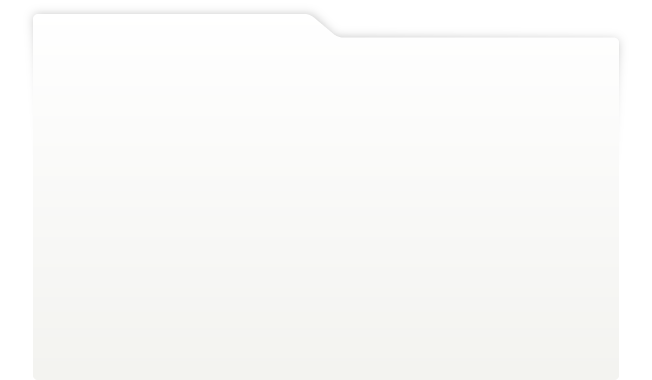
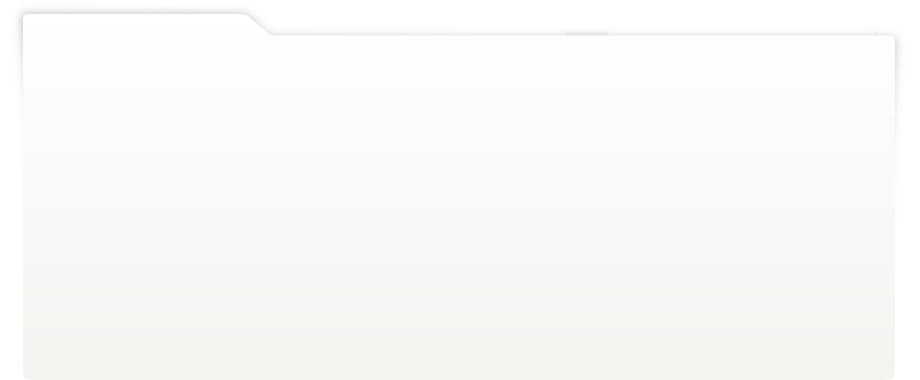
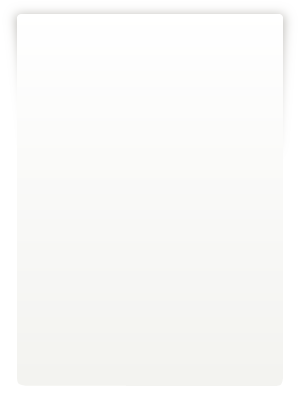
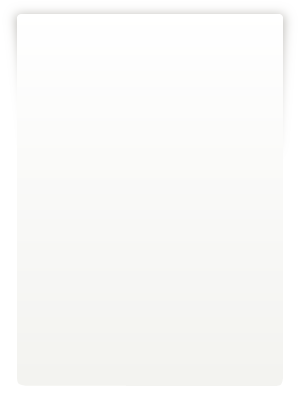
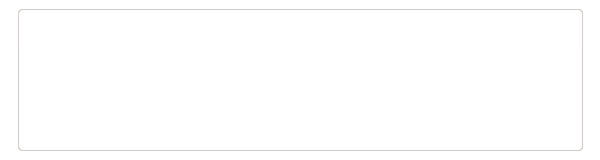
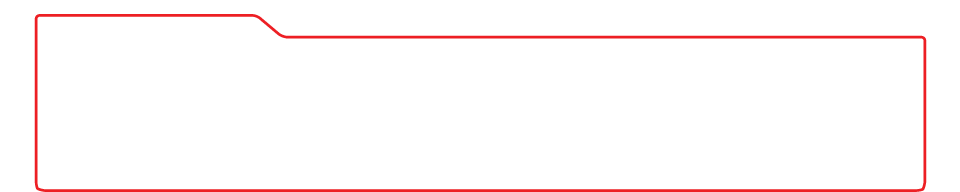
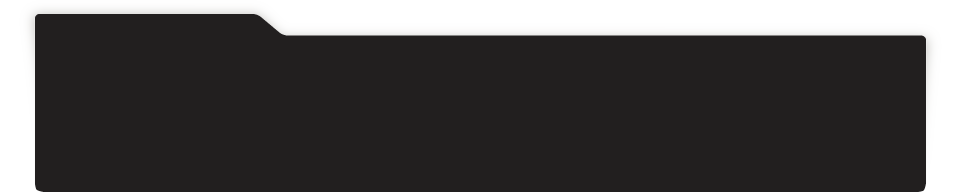
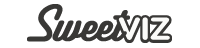
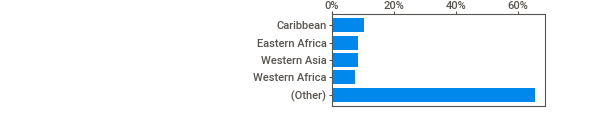
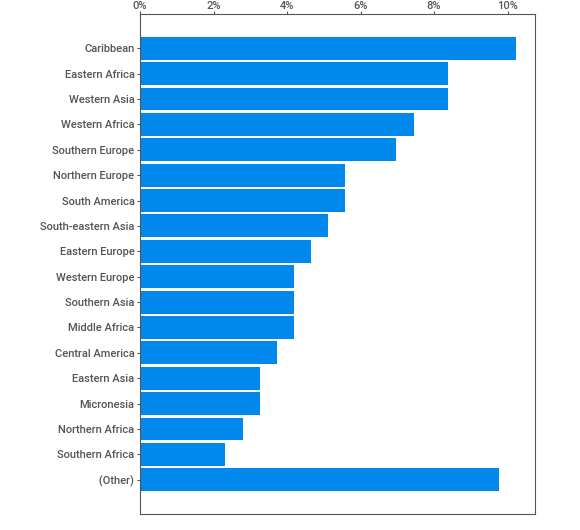
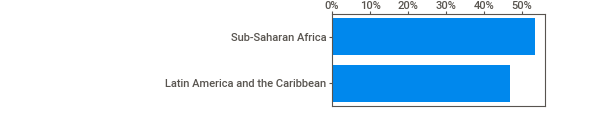
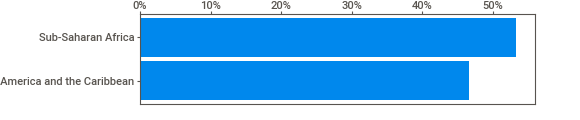
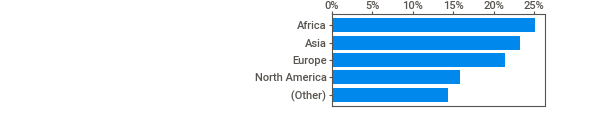
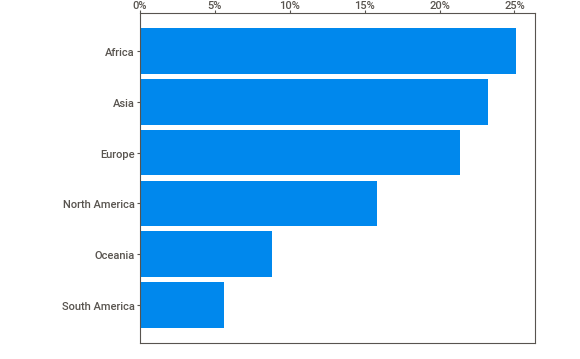
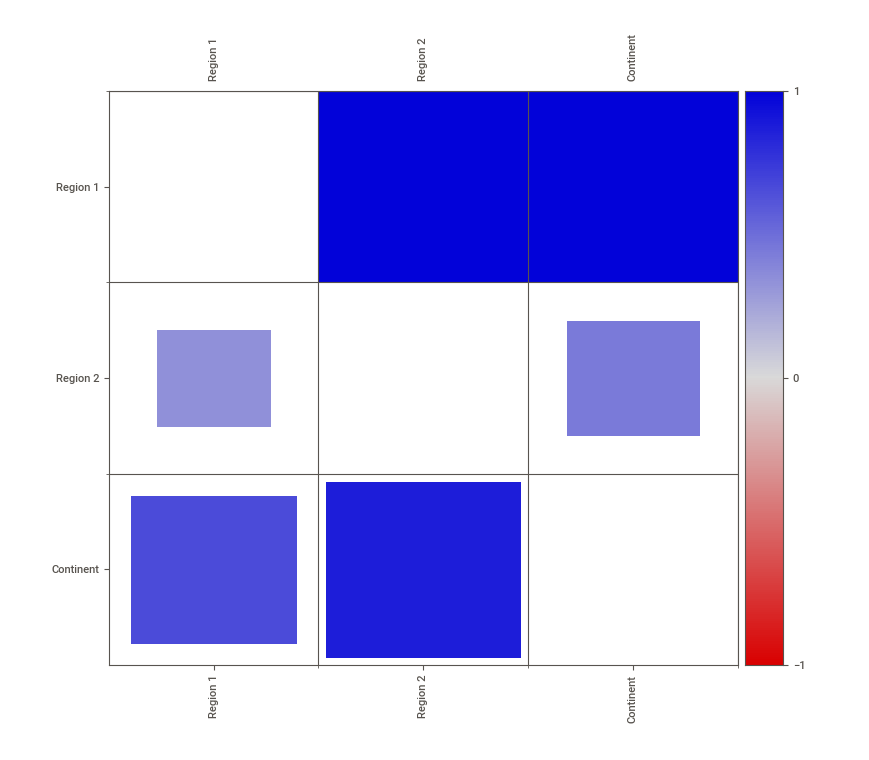
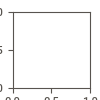

In [ ]:
sweet_report.show_notebook()

# World Development Indicators Plots and Maps

## **WDI Plots**

### **Mortality Rate**

`Mortality rate, adult, female (per 1,000 female adults)`<br>
`Mortality rate, adult, female (per 1,000 male adults)`

**Create Filter for Indicator**

In [ ]:
df_plot['Indicator Name'][df_plot['Indicator Name'].str.contains('Mortality rate, adult')].unique()

array(['Mortality rate, adult, female (per 1,000 female adults)',
       'Mortality rate, adult, male (per 1,000 male adults)'],
      dtype=object)

In [ ]:
ind = df_plot['Indicator Name'][df_plot['Indicator Name'].str.contains('Mortality rate, adult, male')].unique()
ind

ind_plot = ['Philippines', 'Singapore', 'Japan']

**WORLDWIDE**

In [ ]:
df_mort_world = df_plot.groupby(['Continent','Country Name','Year','Indicator Name'])['Value'].mean().reset_index()

In [ ]:
# filter indicator
df_graph = df_mort_world[(df_mort_world['Indicator Name'].isin(ind)) & (df_mort_world['Country Name'].isin(ind_plot))]

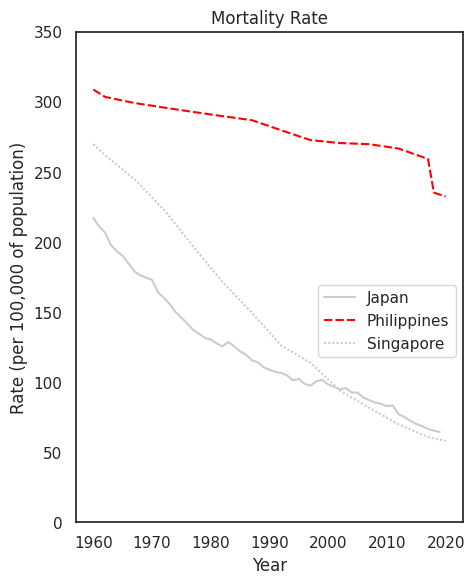

In [ ]:
plt.figure(figsize=(5,6.5))
sns.set(style='white', font_scale = 1)
sns.lineplot(x = 'Year', 
             y = 'Value', 
             hue = 'Country Name',
             palette = ['#cccccc','#ff0000','#cccccc'],
             ci = None,
             style = 'Country Name',
             data = df_graph)
plt.legend(loc='bottom', bbox_to_anchor=(1, 0.5))
plt.title('Mortality Rate')
plt.ylabel('Rate (per 100,000 of population)')
plt.ylim(0,350)
plt.show()

**Suicide**

In [ ]:
# filter indicator
df_graph_suic = df_mort_world[(df_mort_world['Indicator Name']=='Suicide mortality rate (per 100,000 population)') & (df_mort_world['Country Name'].isin(ind_plot))]


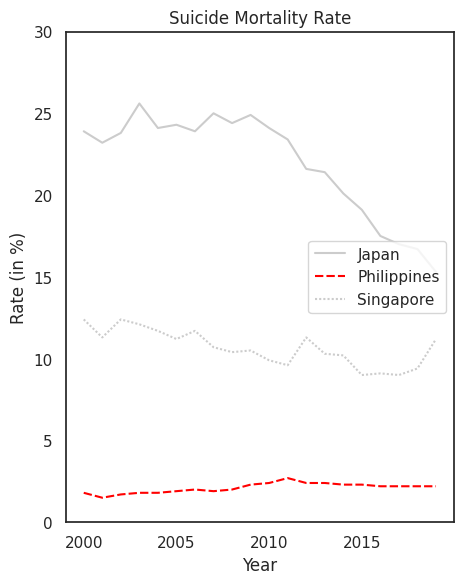

In [ ]:
plt.figure(figsize=(5,6.5))
sns.set(style='white', font_scale = 1)
sns.lineplot(x = 'Year',
             y = 'Value', 
             hue = 'Country Name',
             palette = ['#cccccc','#ff0000','#cccccc'],
             ci=None,
             style = 'Country Name',
             data=df_graph_suic)
plt.legend(loc='right', bbox_to_anchor=(1, 0.5))
plt.title('Suicide Mortality Rate')
plt.ylabel('Rate (in %)')
plt.ylim(0,30)
#plt.xticks([2000, 2002, 2005, 2007, 2010, 2012, 2015, 2018])
plt.show()

In [ ]:
df_graph_suic['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

**Rural and Urban Population**

In [ ]:
#df_plot['Indicator Name'][df_plot['Indicator Name'].str.contains('Rural')].unique()
ind_rural = df_plot['Indicator Name'][df_plot['Indicator Name'].str.contains('Rural')].unique()
#ind


array(['Rural land area (sq. km)',
       'Rural land area where elevation is below 5 meters (% of total land area)',
       'Rural land area where elevation is below 5 meters (sq. km)',
       'Rural population', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Rural population living in areas where elevation is below 5 meters (% of total population)'],
      dtype=object)

In [ ]:
# filter indicator
df_graph_rural = df_mort_world[(df_mort_world['Indicator Name']=='Rural population (% of total population)') & (df_mort_world['Country Name'].isin(ind_plot))]


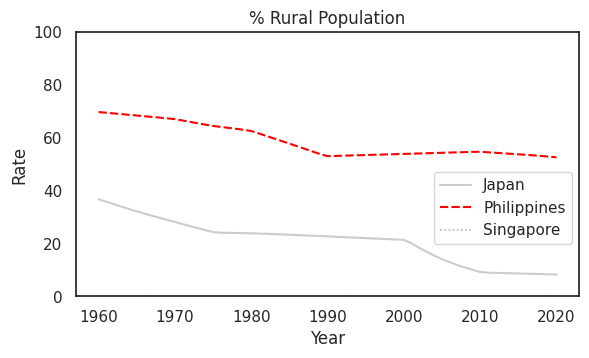

In [ ]:
plt.figure(figsize=(6.5,3.5))
sns.set(style='white', font_scale = 1)
sns.lineplot(x = 'Year',
             y = 'Value', 
             hue = 'Country Name',
             palette = ['#cccccc','#ff0000','#cccccc'],
             ci=None,
             style = 'Country Name',
             data=df_graph_rural)
plt.legend(loc='top', bbox_to_anchor=(1, 0.5))
plt.title('% Rural Population')
plt.ylabel('Rate')
plt.ylim(0,100)
#plt.xticks([2000, 2002, 2005, 2007, 2010, 2012, 2015, 2018])
plt.show()

In [ ]:
# filter indicator
df_graph_urban = df_mort_world[(df_mort_world['Indicator Name']=='Urban population (% of total population)') & (df_mort_world['Country Name'].isin(ind_plot))]


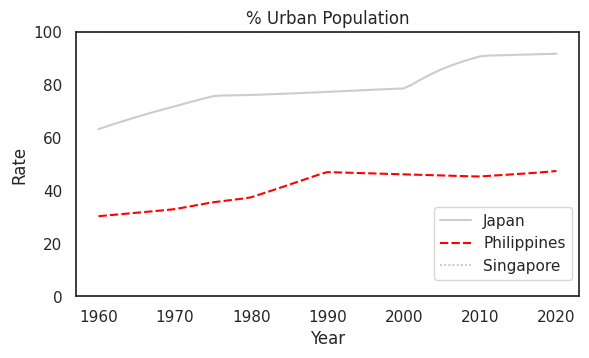

In [ ]:
plt.figure(figsize=(6.5,3.5))
sns.set(style='white', font_scale = 1)
sns.lineplot(x = 'Year',
             y = 'Value', 
             hue = 'Country Name',
             palette = ['#cccccc','#ff0000','#cccccc'],
             ci=None,
             style = 'Country Name',
             data=df_graph_urban)
plt.legend(loc='right', bbox_to_anchor=(1, 0.2))
plt.title('% Urban Population')
plt.ylabel('Rate')
plt.ylim(0,100)
#plt.xticks([2000, 2002, 2005, 2007, 2010, 2012, 2015, 2018])
plt.show()